**PROBLEM STAMENT:**

Heart disease is one of the main cause of death in world so detecting and predicting it is important for better treatment. Machine learning become very helpful in healthcare for predicting conditions like heart disease.

**Solution :**

The objective of this project is to build a robust and accurate model to predict whether a patient is likely to have heart disease, based on various clinical and lifestyle features. The solution includes multiple machine learning models, hyperparameter tuning, and handling data imbalance for optimal prediction performance.
1)Data Collection 2)Data Cleaning 3)Outlier Removal 4)Encoding 5)Feature Scaling

6)Train-Test Split with Stratification 

**Model Training: **
 Logistic Regression,RandomForestClassifier,DecisionTreeCLassifier,KNN,XGBOOST And then Hyperparameter Tuning





**Overall Conclusion for Random ForestCLassifier :**The Random ForestCLassifier model achieved an  better  accuracy overall of 91%. In summary, the XGBOOST  model demonstrates better  performance  with

 **high accuracy=89%, precision=88%, recall=92%, and F1-scores=90%**



* **Overall Colclusion for  XGBOOST :-**The  XGBOOST demonstrates a strong performance similar to the Random ForestCLassifier model. It achieves high accuracy, precision, recall, and F1-scores, making it an effective and reliable choice .

 **high accuracy=83%, precision=78%, recall=97%, and F1-scores=86%**







In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from scipy.stats import skew

In [4]:
df = pd.read_csv("heart.csv")

In [5]:
#The Dataset has [918 ] rows and 12 Features
print("Dataset shape:", df.shape)

Dataset shape: (918, 12)


In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.info()
#There is no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.duplicated().sum()
#There was no duplicates

np.int64(0)

In [9]:
df.describe()
#there is skewness in RestingBP,cholestrol,MaxHr,Oldpeak)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
#there were 0's in cholestrol and RestingBP  which was removed
df_cleaned = df[df['RestingBP'] != 0]
df_cleaned = df_cleaned[df_cleaned['Cholesterol'] != 0]
print(f"Shape after removing 0s from RestingBP and Cholesterol: {df_cleaned.shape}")


Shape after removing 0s from RestingBP and Cholesterol: (746, 12)


In [11]:
numerical_cols_for_iqr = [ 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [12]:
for col in numerical_cols_for_iqr:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
#The Outlier was removed but cholestrol still has still mild outlier


--- Boxplots After Outlier Removal ---


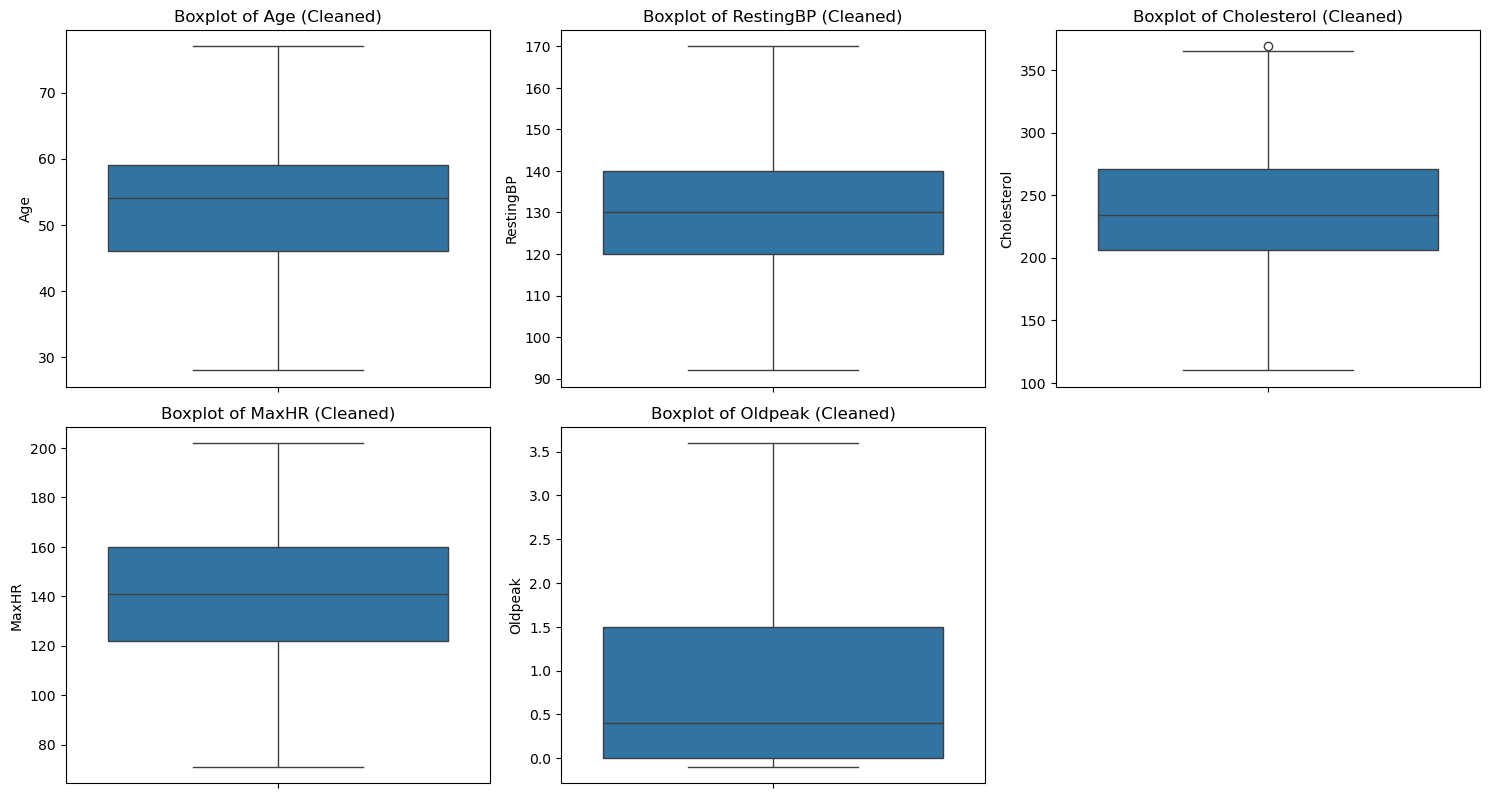

In [13]:
# visualize Boxplots After Outlier Removal
print("\n--- Boxplots After Outlier Removal ---")
# Identify numerical columns again for plotting
numerical_cols_plot = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'HeartDisease' from plot list as it's a target variable and not for outlier detection
if 'HeartDisease' in numerical_cols_plot:
    numerical_cols_plot.remove('HeartDisease')
if 'FastingBS' in numerical_cols_plot:
    numerical_cols_plot.remove('FastingBS') # Exclude if it was included in numerical_cols


plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols_plot):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f"Boxplot of {col} (Cleaned)")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**Boxplots show clean distributions with outliers removed, except for one mild outlier in Cholesterol.**

In [14]:
numerical_cols_for_skew = [ 'Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

skewed_features = df_cleaned[numerical_cols_for_skew].apply(lambda x: skew(x.dropna()))
print("Initial skewness of numerical features (before transformation):")
print(skewed_features)

skewed_features_to_transform = skewed_features[abs(skewed_features) > 0.75].index.tolist()

print(f"Features identified for skewness transformation (abs skew > 0.75): {skewed_features_to_transform}")

for col in skewed_features_to_transform:
    if (df_cleaned[col] >= 0).all():
        df_cleaned[col] = np.log1p(df_cleaned[col])
        print(f"Applied log1p transformation to {col}.")
    else:
        min_val = df_cleaned[col].min()
        shift = abs(min_val) + 1  # Ensure all values become positive
        df_cleaned[col] = np.log1p(df_cleaned[col] + shift)
        print(f"Applied log1p transformation to {col} after shifting by {shift} (due to negative values).")
#there was skewness in oldpeak which was transformed using log1p becuase it was having negative values


Initial skewness of numerical features (before transformation):
Age           -0.065731
RestingBP      0.193604
Cholesterol    0.174857
MaxHR         -0.152470
Oldpeak        0.888924
dtype: float64
Features identified for skewness transformation (abs skew > 0.75): ['Oldpeak']
Applied log1p transformation to Oldpeak after shifting by 1.1 (due to negative values).


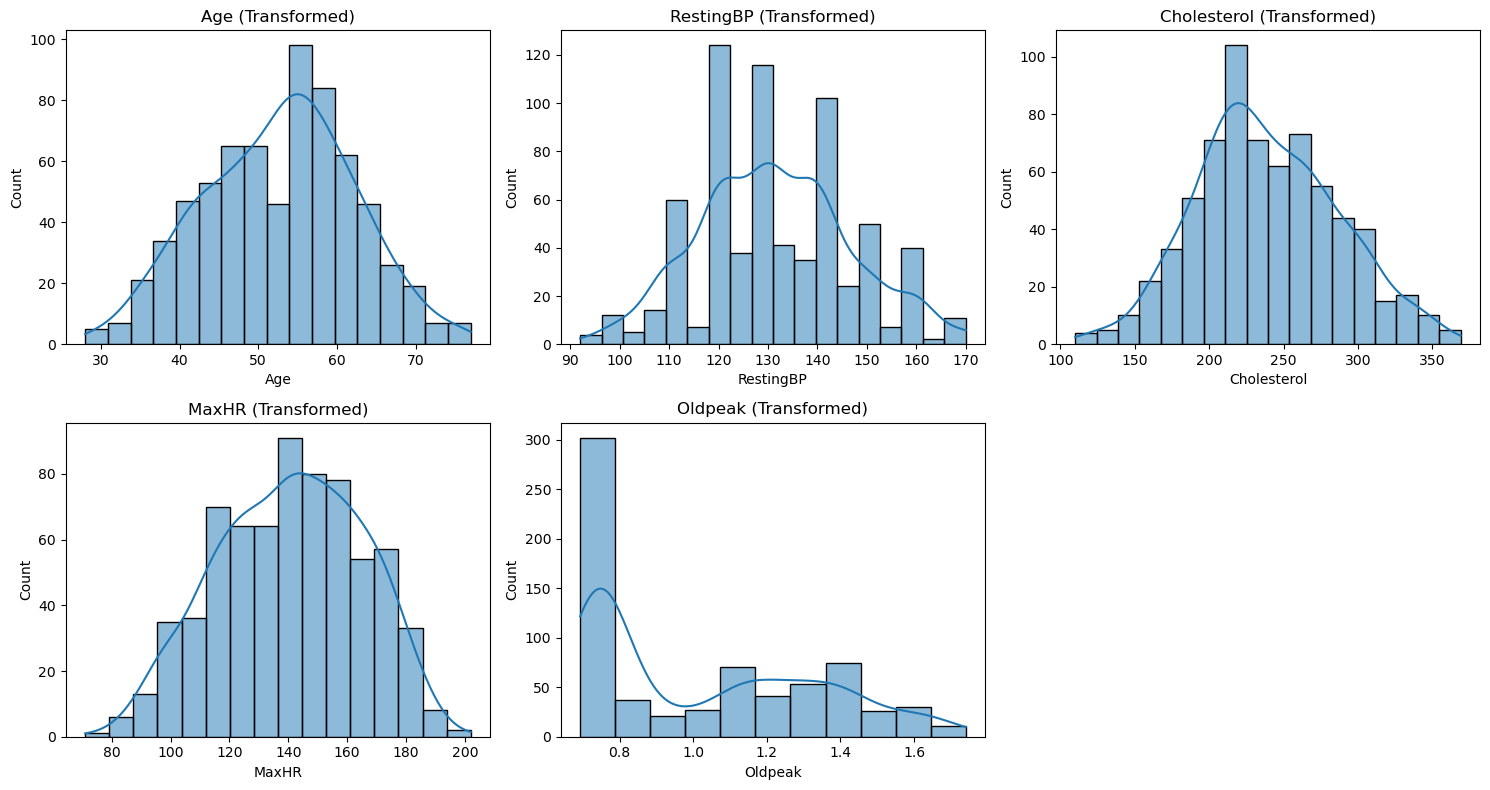

In [15]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols_for_skew):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f"{col} (Transformed)")
plt.tight_layout()
plt.show()

**After applying log1p transformation to skewed features, distributions like  Oldpeak became more symmetric, improving model readiness.**

**Plotting Categorial Columns**

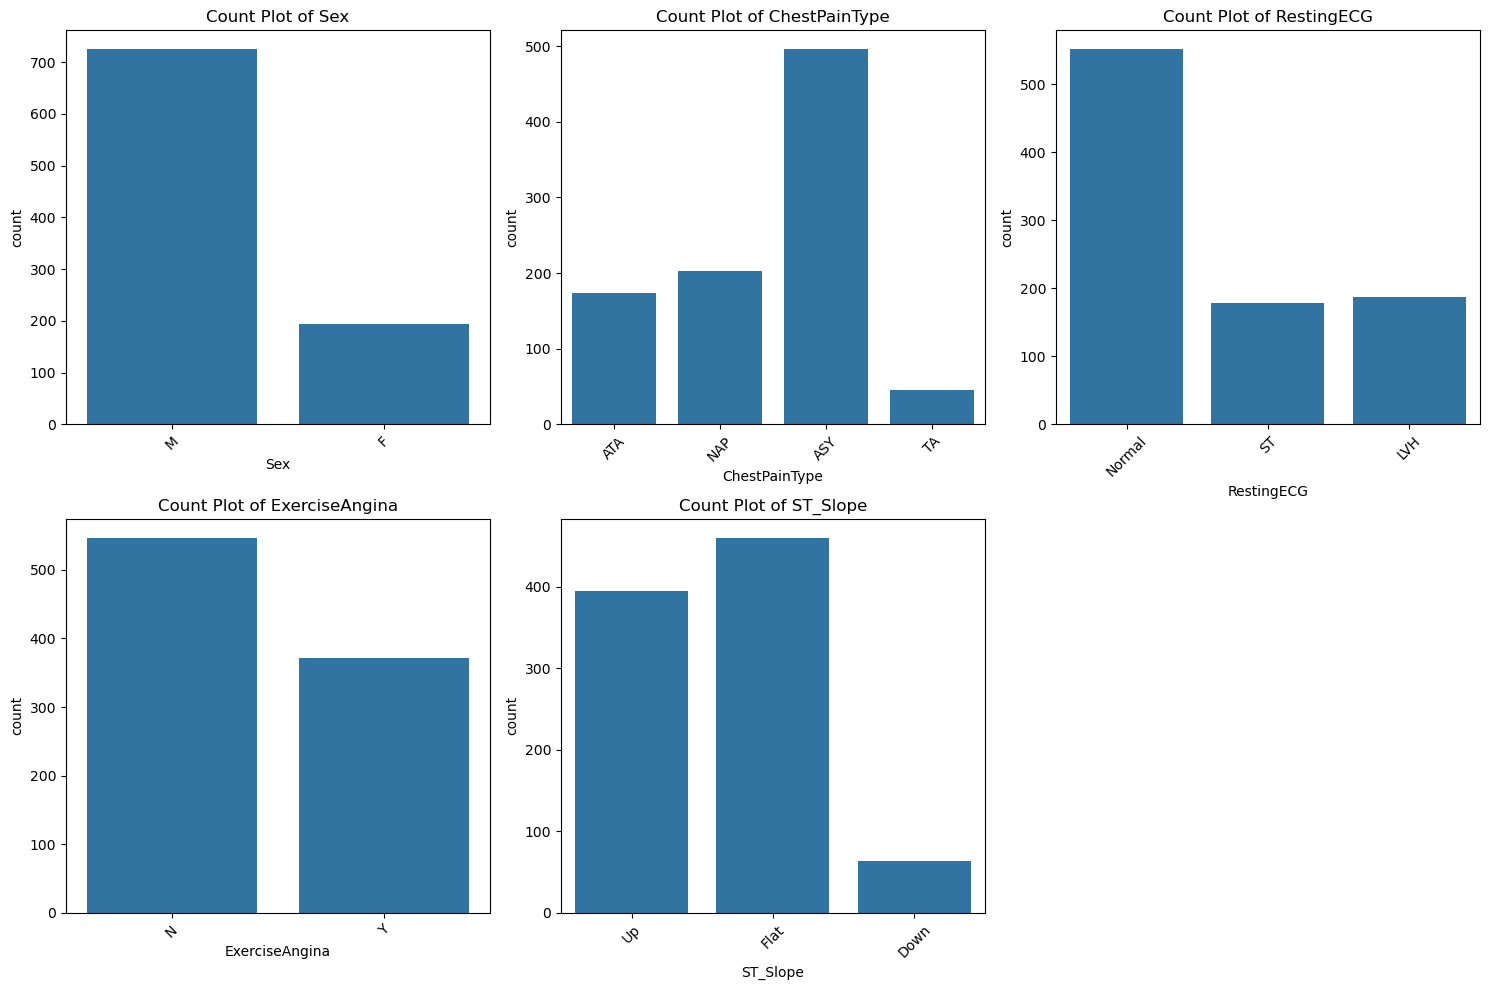

In [16]:
# Categorical columns bar plots
categorical_cols = df.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The dataset mostly includes male patients with asymptomatic chest pain, normal ECG, and no exercise-angina, with flat ST slope being the most common**

**Correlation heatmap**


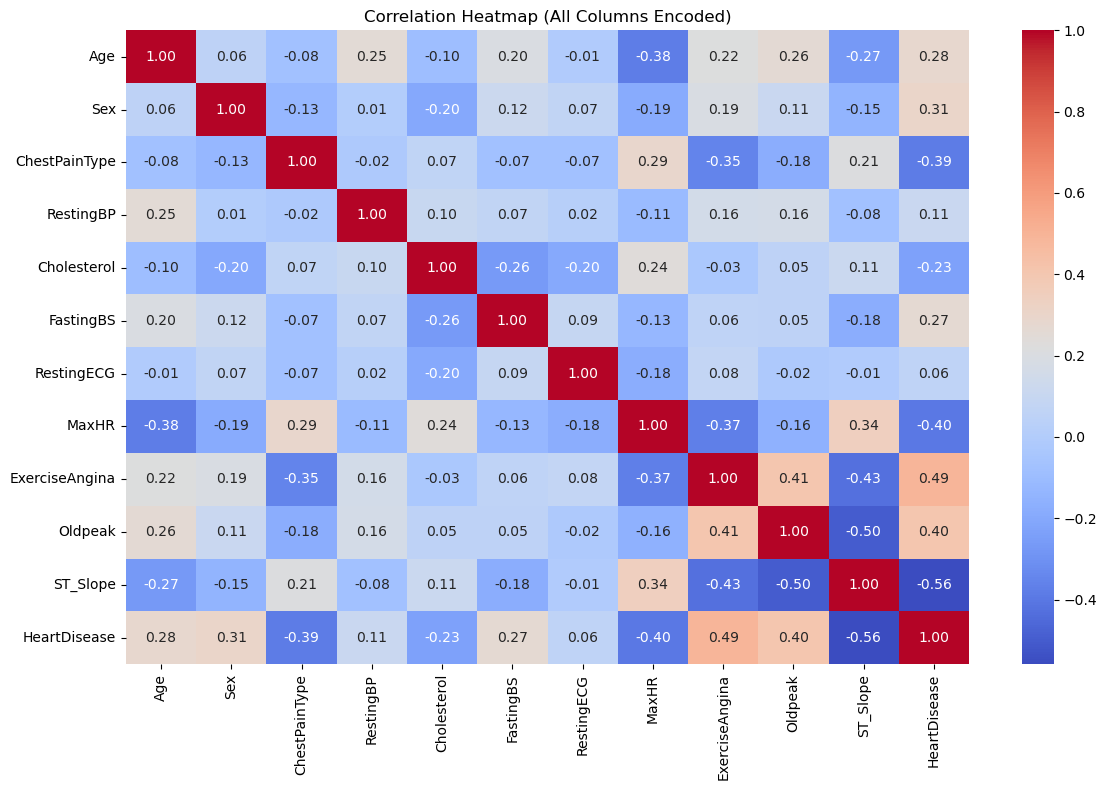

In [17]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (All Columns Encoded)")
plt.tight_layout()
plt.show()
#Strongest positive: ExerciseAngina, Oldpeak
#No/weak correlation: RestingECG, borderline RestingBP
#Strongest negative: ST_Slope, MaxHR, ChestPainType

**Target Value**

In [18]:
df.value_counts('HeartDisease')

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [19]:
#Splittling features and target
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]


In [20]:
#It splits the data into training and testing sets, keeping the targets class balance, with 80% for training and 20% for testing.also used stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(734, 11) (734,)
(184, 11) (184,)


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "DecisionTree":DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}


In [23]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        82
           1       0.86      0.91      0.89       102

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        82
           1       0.90      0.92      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184


=== DecisionTree ===
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        82
           1       0.79      0.79      0.79       102

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184


In [24]:
results = {}

**HyperParameter Tunning(RandomizedSearchCV)**

In [25]:
rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'  # important for medical datasets
)

rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [26]:
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=30,
    scoring='recall',      # 🔥 focus on recall (disease detection)
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rf_random.fit(X_train, y_train)

print("Best Random Forest Parameters:")
print(rf_random.best_params_)

best_rf = rf_random.best_estimator_

# Evaluate
y_pred_rf = best_rf.predict(X_test)
print("\nTuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Random Forest Parameters:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}

Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        82
           1       0.88      0.92      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



In [27]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)


In [28]:

xgb_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [1, 2, 3]  # handle class imbalance
}


In [29]:
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_grid,
    n_iter=30,
    scoring='recall',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

xgb_random.fit(X_train, y_train)

print("Best XGBoost Parameters:")
print(xgb_random.best_params_)

best_xgb = xgb_random.best_estimator_

# Evaluate
y_pred_xgb = best_xgb.predict(X_test)
print("\nTuned XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best XGBoost Parameters:
{'subsample': 0.7, 'scale_pos_weight': 2, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}

Tuned XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.66      0.78        82
           1       0.78      0.97      0.86       102

    accuracy                           0.83       184
   macro avg       0.86      0.81      0.82       184
weighted avg       0.85      0.83      0.83       184



In [30]:
models = {
    "Random Forest Tuned": best_rf,
    "XGBoost Tuned": best_xgb
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))



=== Random Forest Tuned ===
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        82
           1       0.88      0.92      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184


=== XGBoost Tuned ===
              precision    recall  f1-score   support

           0       0.95      0.66      0.78        82
           1       0.78      0.97      0.86       102

    accuracy                           0.83       184
   macro avg       0.86      0.81      0.82       184
weighted avg       0.85      0.83      0.83       184



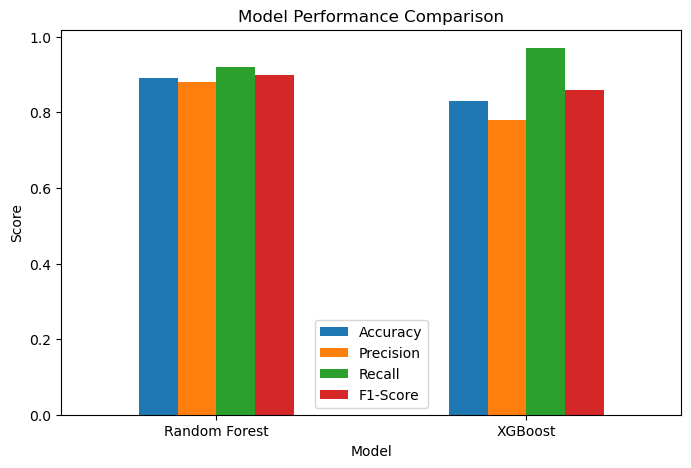

In [31]:
metrics = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [0.89, 0.83],
    'Precision': [0.88, 0.78],
    'Recall': [0.92, 0.97],
    'F1-Score': [0.90, 0.86]
})
metrics.set_index('Model').plot(kind='bar', figsize=(8,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()
